<a href="https://colab.research.google.com/github/ShuqairABD/ResNet_152_-/blob/main/Abdalla_Shuqair/ResNet_152_%D0%9C%D0%9E%D0%99%D0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **start**

In [ ]:
!pip install torch torchvision


In [ ]:
import torch
from torch.utils.data import Dataset, Subset, DataLoader
from torchvision import models, transforms
from torchvision.io import read_image, ImageReadMode
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import albumentations as A
from torchvision.transforms import v2
import numpy as np
import cv2
from PIL import Image
import PIL
from pathlib import Path
import os
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import copy
from torchsummary import summary
from datetime import datetime
from tqdm import tqdm
import gc
import random
import pandas as pd
import pprint
from tabulate import tabulate

import torchvision.models as models
from torch.optim import Adam
from torchvision.models import resnet50
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, SubsetRandomSampler
from torchvision.datasets import ImageFolder
from torch.utils.data import Subset


from torchvision import models, transforms, datasets



from torch.utils.data import DataLoader, random_split

from torch.optim.lr_scheduler import StepLR


## Resize images (при необходимости)

In [ ]:
# def resize_images(input_dir, output_dir, target_size):
#     # Создание каталога для выходных изображений, если он не существует
#     os.makedirs(output_dir, exist_ok=True)

#     # Итерация по каждому подкаталогу (папке класса) во входном каталоге
#     for root, _, files in os.walk(input_dir):
#         for file in files:
#             # Проверка, является ли файл файлом изображения
#             if file.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
#                 # Составление путей к файлам ввода и вывода
#                 input_path = os.path.join(root, file)
#                 output_path = os.path.join(output_dir, os.path.relpath(input_path, input_dir))

#                 # Создание каталогов для пути к выходному файлу, если необходимо
#                 os.makedirs(os.path.dirname(output_path), exist_ok=True)

#                 # Открытие изображения
#                 with Image.open(input_path) as img:
#                     # Изменение размера изображения
#                     img_resized = img.resize(target_size, Image.ANTIALIAS)

#                     # Сохранение измененного изображения
#                     img_resized.save(output_path)


# input_directory = '/content/drive/MyDrive/WEATHER'  # # каталог, содержащий исходные изображения
# output_directory = '/content/resiezed_images'  # каталог, в котором будут сохранены измененные изображения
# target_image_size = (640, 640)  #  целевой размер для измененных изображений

# # Изменение размера изображений
# resize_images(input_directory, output_directory, target_image_size)

# print("Image resizing complete.")


In [ ]:
# def resize_images(input_folder, output_folder, target_size):
#   max_width = target_size[0]
#   max_height = target_size[0]
#   max_ratio = max_width / max_height
#   color = 3
#   for root, dirs, files in os.walk(input_folder):
#     for file_name in files:
#       try:
#           # Составляем полный путь к входному файлу
#           input_path = os.path.join(root, file_name)
#           output_path = os.path.join(output_folder, os.path.relpath(input_path, input_folder))
#           os.makedirs(os.path.dirname(output_path), exist_ok=True)
#           img_file_out = output_path
#           img = Image.open(input_path)
#           width = img.size[0]
#           height = img.size[1]
#           if width >= height * max_ratio:
#             ratio = width/height
#             w = max_width
#             h = int(w / ratio)
#             if h % 2 >= 1:
#               h += 1
#             img_1 = Image.open(input_path).resize((int(w), int(h)))
#             img_2 = np.array(img_1)
#             zero = np.zeros((int(max_height),int(max_width) ,color))
#             x1 = int((max_height - h)/2)
#             x2 = int(max_height  - x1)
#             zero[x1:x2, :, :] = zero[x1:x2, :, :] + img_2
#             zero = zero.astype(np.uint8)
#             im = Image.fromarray(zero)
# #            print(f'Разрешение файла {file_name} = {img.size}')
# #            print(f'Разрешение измененного файла = {im.size}')
#             im.save(f'{img_file_out}')
#           elif width < height * max_ratio:
#             ratio = width/height
#             h = max_height
#             w = int(h * ratio)
#             if w % 2 >= 1:
#               w += 1
#             img_1 = Image.open(input_path).resize((int(w), int(h)))
#             img_2 = np.array(img_1)
#             zero = np.zeros((int(max_height),int(max_width) ,color))
#             x1 = int((max_width - w)/2)
#             x2 = int(max_width  - x1)
#             zero[:, x1:x2, :] = zero[:, x1:x2, :] + img_2
#             zero = zero.astype(np.uint8)
#             im = Image.fromarray(zero)
# #            print(f'Разрешение файла {file_name} = {img.size}')
# #            print(f'Разрешение измененного файла = {im.size}')
#             im.save(f'{img_file_out}')
#       except Exception as e:
#           print(f"Ошибка при обработке {file_name}: {str(e)}")


# input_directory = '/content/drive/MyDrive/WEATHER'  # # каталог, содержащий исходные изображения
# output_directory = '/content/resiezed_images'  # каталог, в котором будут сохранены измененные изображения
# target_image_size = (640, 640)  #  целевой размер для измененных изображений

# # Изменение размера изображений
# resize_images(input_directory, output_directory, target_image_size)

# print("Image resizing complete.")

## Глобальные переменные

In [ ]:
# path
data_dir = '/content/drive/MyDrive/bouns'
save_weights_logs_dir = '/content/weights'


if not os.path.exists(save_weights_logs_dir):
    os.makedirs(save_weights_logs_dir)
print(f"Weights will be saved in: {save_weights_logs_dir}")


Weights will be saved in: /content/weights


## Подготовка датасета

In [ ]:
# transformation
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomCrop(224, padding=20),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load dataset
dataset = ImageFolder(data_dir, transform=train_transform)


test_split = 0.2
batch_size = 64

# size
test_size = int(test_split * len(dataset))
train_size = len(dataset) - test_size


indices = list(range(len(dataset)))
np.random.shuffle(indices)
train_indices, test_indices = indices[:train_size], indices[train_size:]


train_sampler = SubsetRandomSampler(train_indices)
test_sampler = SubsetRandomSampler(test_indices)


train_dataloader = DataLoader(dataset, batch_size=batch_size, sampler=train_sampler)
test_dataloader = DataLoader(dataset, batch_size=batch_size, sampler=test_sampler)

dataloaders = {'train': train_dataloader, 'val': test_dataloader}


# **Main model**

## Модель ResNet-152

In [ ]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load  ResNet-152 with pre-trained weights
model = models.resnet152(weights=models.ResNet152_Weights.IMAGENET1K_V1)

# exit Sigmoid
num_ftrs = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_ftrs, 128),
    nn.ReLU(inplace=True),
    nn.Linear(128, 1),
    nn.Sigmoid()
).to(device)


model = model.to(device)


Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth
100%|██████████| 230M/230M [00:02<00:00, 95.8MB/s]


## Training (main model)

In [ ]:
torch.cuda.empty_cache()
gc.collect()

9

In [ ]:
def model_training(num_epochs, model, dataloaders, criterion, optimizer, scheduler, save_weights_logs_dir, model_name='resnet152', device='cuda'):
    train_loss_history = []
    train_acc_history = []
    val_acc_history = []

    for epoch in range(num_epochs):
        print("=================")
        print(f"Epoch {epoch+1}/{num_epochs}")
        print("=================")

        model.train()
        running_loss = 0.0
        correct_predictions = 0
        total_predictions = 0

        for images, labels in dataloaders['train']:
            images, labels = images.to(device), labels.to(device).float().view(-1, 1)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)
            correct_predictions += ((outputs > 0.5).float() == labels).sum().item()
            total_predictions += labels.size(0)

        epoch_train_loss = running_loss / len(dataloaders['train'].dataset)
        epoch_train_acc = correct_predictions / total_predictions

        print(f"Train loss: {epoch_train_loss:.4f}, Train accuracy: {epoch_train_acc:.4f}")
        train_loss_history.append(epoch_train_loss)
        train_acc_history.append(epoch_train_acc)

        model.eval()
        val_correct_predictions = 0
        val_total_predictions = 0

        with torch.no_grad():
            for val_images, val_labels in dataloaders['val']:
                val_images, val_labels = val_images.to(device), val_labels.to(device).float().view(-1, 1)
                val_outputs = model(val_images)
                val_correct_predictions += ((val_outputs > 0.5).float() == val_labels).sum().item()
                val_total_predictions += val_labels.size(0)

        epoch_val_acc = val_correct_predictions / val_total_predictions
        val_acc_history.append(epoch_val_acc)

        print(f"Validation accuracy: {epoch_val_acc:.4f}")
        scheduler.step()

        save_path = f"{save_weights_logs_dir}/{model_name}_epoch_{epoch+1}.pth"
        torch.save(model.state_dict(), save_path)

    return save_path, (train_loss_history, train_acc_history, val_acc_history)


In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[25, 40], gamma=0.1)
criterion = torch.nn.BCELoss()


In [ ]:
num_epochs = 10
print("Starting training...")
save_path, _ = model_training(num_epochs, model, dataloaders, criterion, optimizer, scheduler, save_weights_logs_dir, model_name='resnet152', device=device)
print("Training complete.")
print(f"Model weights saved to: {save_path}")


Starting training...
Epoch 1/10
Train loss: 0.0622, Train accuracy: 0.9494
Validation accuracy: 1.0000
Epoch 2/10
Train loss: 0.0004, Train accuracy: 1.0000
Validation accuracy: 1.0000
Epoch 3/10
Train loss: 0.0002, Train accuracy: 1.0000
Validation accuracy: 1.0000
Epoch 4/10
Train loss: 0.0010, Train accuracy: 0.9994
Validation accuracy: 0.9875
Epoch 5/10
Train loss: 0.0001, Train accuracy: 1.0000
Validation accuracy: 1.0000
Epoch 6/10
Train loss: 0.0000, Train accuracy: 1.0000
Validation accuracy: 1.0000
Epoch 7/10
Train loss: 0.0000, Train accuracy: 1.0000
Validation accuracy: 1.0000
Epoch 8/10
Train loss: 0.0000, Train accuracy: 1.0000
Validation accuracy: 1.0000
Epoch 9/10
Train loss: 0.0000, Train accuracy: 1.0000
Validation accuracy: 1.0000
Epoch 10/10
Train loss: 0.0000, Train accuracy: 1.0000
Validation accuracy: 1.0000
Training complete.
Model weights saved to: /content/weights/resnet152_epoch_10.pth


In [ ]:
# Копирование файла весов в Google Drive
!cp /content/weights/resnet152_epoch_10.pth /content/drive/MyDrive/resnet152_epoch_10.pth

# Проверка наличия файла в Google Drive
!ls /content/drive/MyDrive/

# Проверка размера файла в Google Drive
#!ls -lh /content/pretrained_5/new_fine_tuned5_resnet152.pth

# Проверка размера исходного файла в Colab
#!ls -lh /content/pretrained_5/new_fine_tuned5_resnet152.pth



## test main model

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
model = models.resnet152(weights=None)
num_ftrs = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_ftrs, 128),
    nn.ReLU(inplace=True),
    nn.Linear(128, 1),
    nn.Sigmoid()
).to(device)

# pretrained weights
model_path = '/content/weights/resnet152_epoch_10.pth'
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)
model.eval()


In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [ ]:
label_mapping = {'Healthy': 0, 'Unhealthy': 1}

Predicted class name for IMG-0002-00592_result.png: Healthy


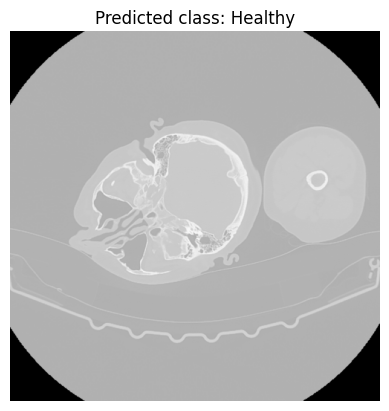

Predicted class name for IMG-0002-00585_result.png: Healthy


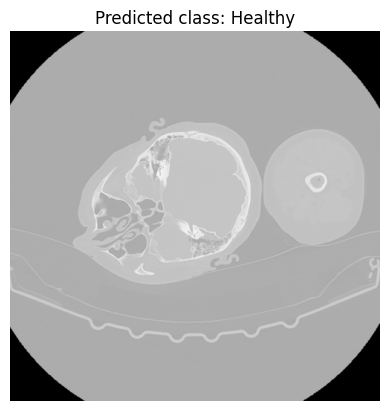

Predicted class name for IMG-0002-00554_result.png: Healthy


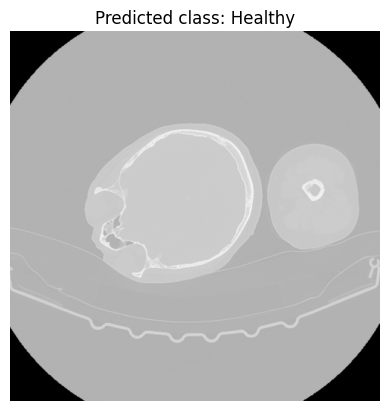

Predicted class name for IMG-0002-00553_result.png: Healthy


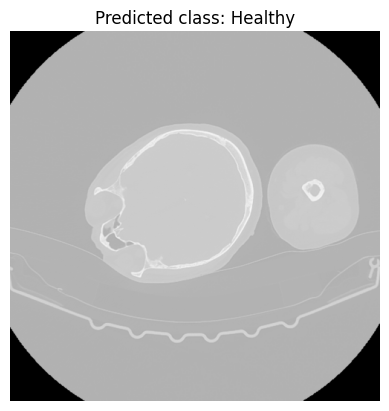

Predicted class name for IMG-0002-00545_result.png: Healthy


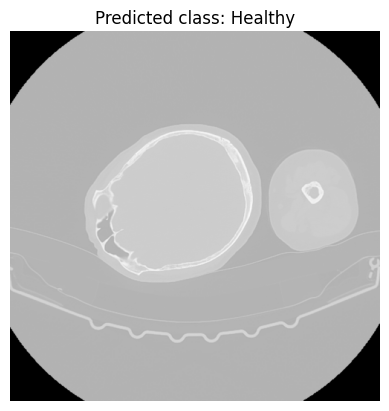

Predicted class name for IMG-0002-00494_result.png: Healthy


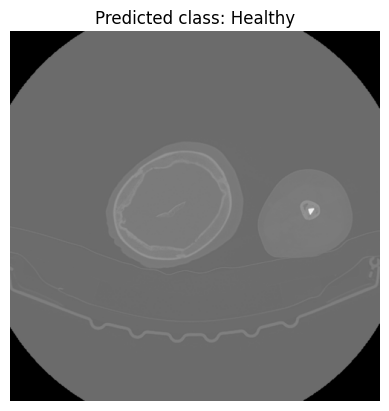

Predicted class name for IMG-0002-00492_result.png: Healthy


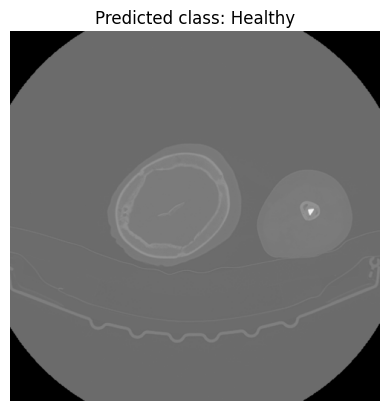

Predicted class name for IMG-0002-00467_result.png: Healthy


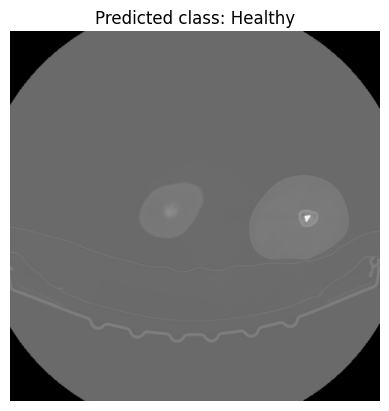

Predicted class name for IMG-0002-00458_result.png: Healthy


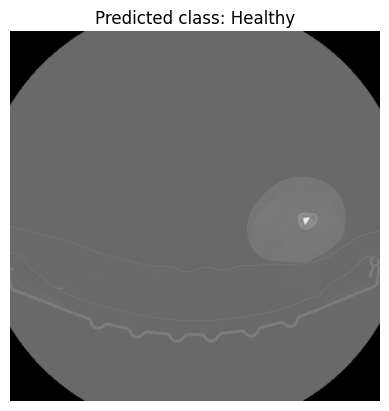

Predicted class name for IMG-0002-00482_result.png: Unhealthy


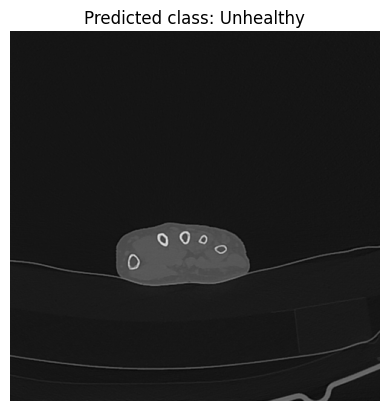

Predicted class name for IMG-0002-00487_result.png: Unhealthy


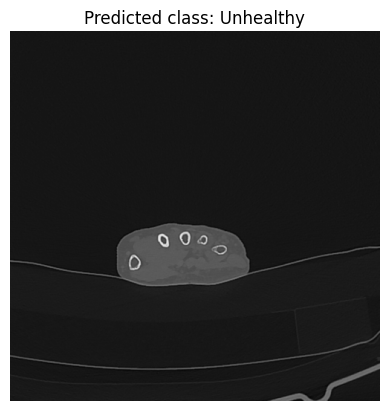

Predicted class name for IMG-0002-00486_result.png: Unhealthy


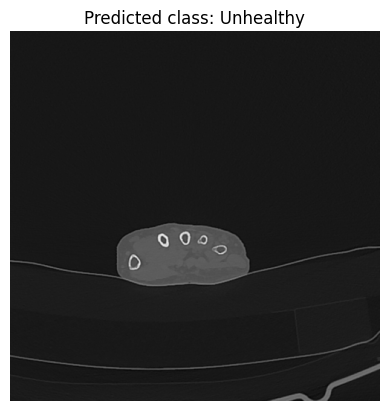

Predicted class name for IMG-0002-00480_result.png: Unhealthy


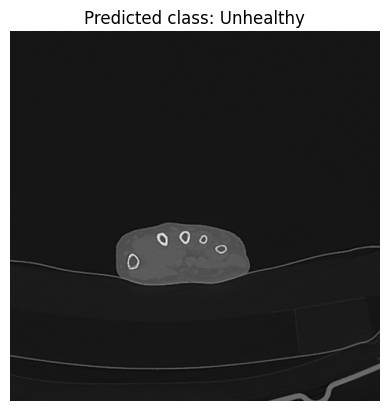

Predicted class name for IMG-0002-00354_result.png: Unhealthy


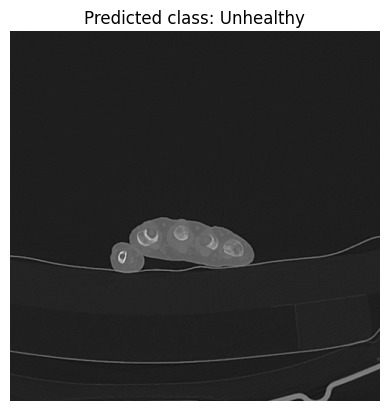

Predicted class name for IMG-0002-00356_result.png: Unhealthy


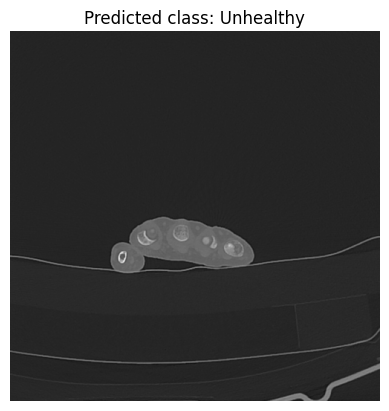

Predicted class name for IMG-0002-00353_result.png: Unhealthy


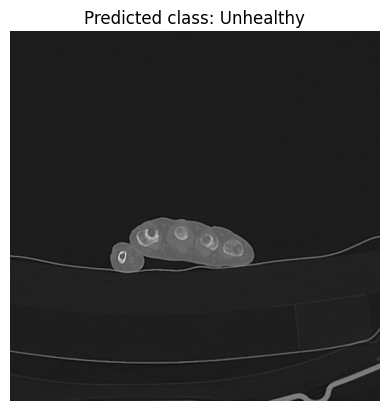

Predicted class name for IMG-0002-00355_result.png: Unhealthy


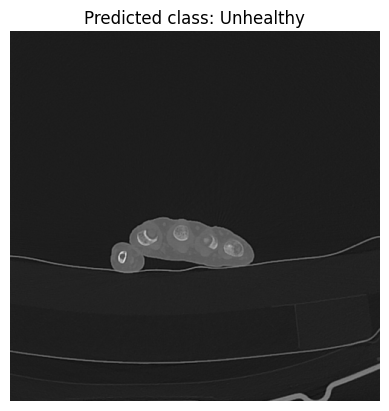

Predicted class name for IMG-0002-00259_result.png: Unhealthy


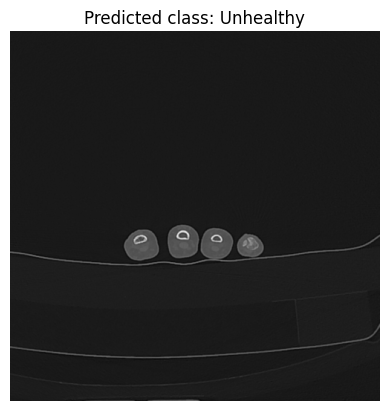

Predicted class name for IMG-0002-00258_result.png: Unhealthy


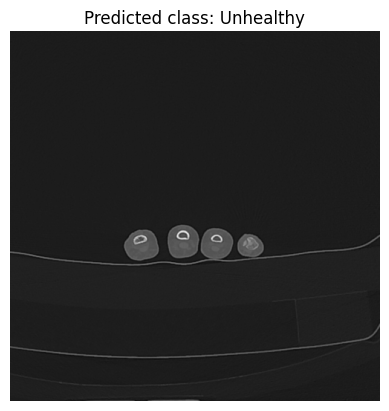

Predicted class name for IMG-0002-00260_result.png: Unhealthy


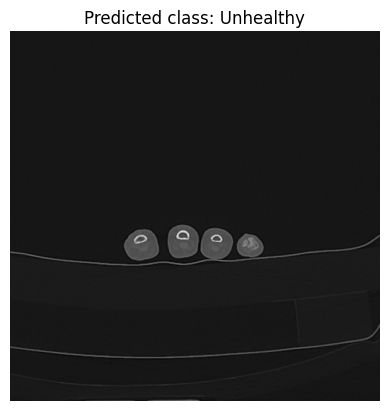

Predicted class name for IMG-0002-00151_result.png: Unhealthy


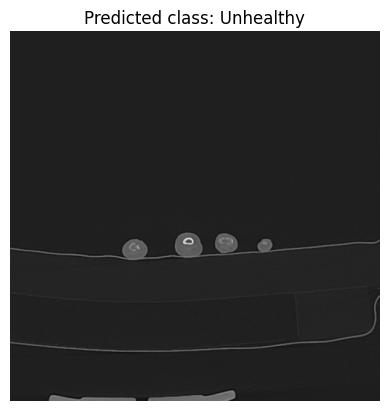

Predicted class name for IMG-0002-00149_result.png: Unhealthy


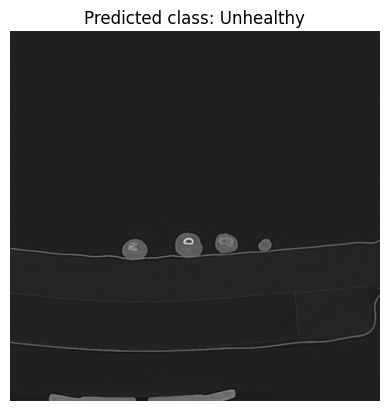

Predicted class name for IMG-0002-00150_result.png: Unhealthy


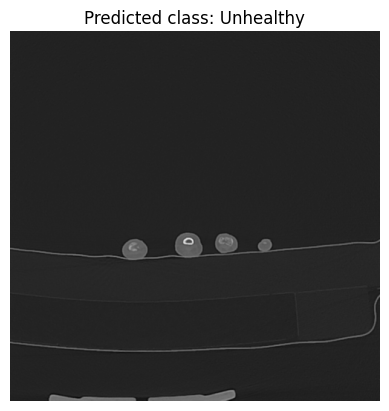

Predicted class name for IMG-0002-00148_result.png: Unhealthy


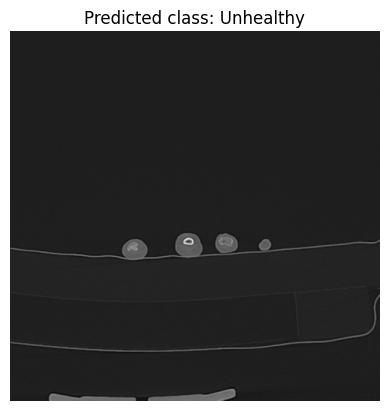

Predicted class name for IMG-0002-00147_result.png: Unhealthy


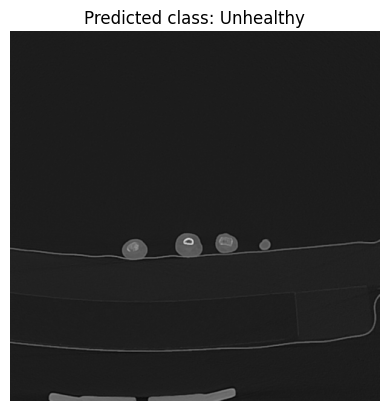

In [ ]:
from torchvision import transforms, models

folder_path = '/content/drive/MyDrive/test2'

for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):

        image_path = os.path.join(folder_path, filename)
        image = Image.open(image_path).convert('RGB')
        input_image = transform(image).unsqueeze(0).to(device)


        with torch.no_grad():
            output = model(input_image)


        predicted = (output > 0.5).float()  # For binary classification

        # class name
        predicted_label = predicted.item()
        predicted_class_name = list(label_mapping.keys())[list(label_mapping.values()).index(int(predicted_label))]


        print(f"Predicted class name for {filename}: {predicted_class_name}")


        plt.imshow(image)
        plt.title(f"Predicted class: {predicted_class_name}")
        plt.axis('off')
        plt.show()


**weights download**

In [ ]:
import shutil
import os
from google.colab import files

folder_path = '/content/weights'
zip_path = '/content/weights.zip'

shutil.make_archive(zip_path.replace('.zip', ''), 'zip', folder_path)

files.download(zip_path)
